# Module 8: Dimensionality Reduction
## Case Study – 2

### Understand and practice linear discriminant analysis using scikit learn. 

In [10]:
# 1. Scikit learn comes with the pre-loaded dataset, load the digits dataset from 
# that collection and write a helper function to plot the image using matplotlib. 
# [Hint: Explore datasets module from scikit learn] 

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 1.
# Step 2: Load the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)
print(digits.target_names[[0]])
print(digits.images[[0]])


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

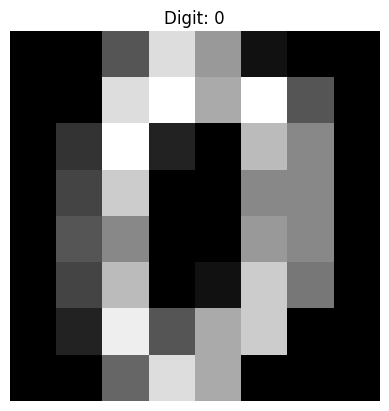

In [11]:
# Helper function to plot an image
def plot_digit_image(index):
    # Select the image at the given index
    image = digits.images[index]
    label = digits.target[index]
    
    # Plot the image with matplotlib
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {label}")
    plt.axis('off')
    plt.show()

# Test the function
plot_digit_image(0)


In [15]:
# 2. StandardScaler and Perform an 80-20 Split
# We will use the digits dataset from scikit-learn and perform an 80-20 train-test split.

X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)



In [16]:
# 3. Logistic Regression Without PCA or LDA
# A a baseline model with logistic regression applied directly to the standardized data without PCA or LDA 
# is an excellent way to evaluate potential overfitting and establish a comparison point for PCA and LDA. 
# 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score


# Fit Logistic Regression directly on standardized data
logistic_model_baseline = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial')
logistic_model_baseline.fit(X_train, y_train)

# Predict and evaluate
y_pred_baseline = logistic_model_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"Accuracy of Logistic Regression without PCA/LDA: {accuracy_baseline * 100:.2f}%")
print("Confusion Matrix for Baseline Logistic Regression:")
print(confusion_matrix(y_test, y_pred_baseline))
print("\nClassification Report for Baseline Logistic Regression:")
print(classification_report(y_test, y_pred_baseline))

# Cross-validation
cv_scores_baseline = cross_val_score(logistic_model_baseline, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy for Baseline Logistic Regression: {cv_scores_baseline.mean() * 100:.2f}%")


Accuracy of Logistic Regression without PCA/LDA: 97.22%
Confusion Matrix for Baseline Logistic Regression:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Classification Report for Baseline Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8      

In [23]:

# 4. Perform PCA and Train Logistic Regression

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit Logistic Regression
logistic_model_pca = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial')
logistic_model_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = logistic_model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of Logistic Regression after PCA: {accuracy_pca * 100:.2f}%")
print("Confusion Matrix for PCA:")
print(confusion_matrix(y_test, y_pred_pca))
print("\nClassification Report for PCA:")
print(classification_report(y_test, y_pred_pca))

# Cross-validation
cv_scores_pca = cross_val_score(logistic_model_pca, X_train_pca, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy for PCA: {cv_scores_pca.mean() * 100:.2f}%")

# Retrieve the number of components retained by PCA
num_components_pca = pca.n_components_
print(f"Number of components retained by PCA to explain 95% variance: {num_components_pca}")



Accuracy of Logistic Regression after PCA: 96.39%
Confusion Matrix for PCA:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  0  2 37]]

Classification Report for PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.96      0.96        28
           2       0.97      0.97      0.97        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.93      0.92        30
           9       0

In [24]:

# 5. Perform LDA and Train Logistic Regression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA with supervised labels
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Fit Logistic Regression
logistic_model_lda = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='multinomial')
logistic_model_lda.fit(X_train_lda, y_train)

# Predict and evaluate
y_pred_lda = logistic_model_lda.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print(f"Accuracy of Logistic Regression after LDA: {accuracy_lda * 100:.2f}%")
print("Confusion Matrix for LDA:")
print(confusion_matrix(y_test, y_pred_lda))
print("\nClassification Report for LDA:")
print(classification_report(y_test, y_pred_lda))

# Cross-validation
cv_scores_lda = cross_val_score(logistic_model_lda, X_train_lda, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy for LDA: {cv_scores_lda.mean() * 100:.2f}%")


Accuracy of Logistic Regression after LDA: 95.00%
Confusion Matrix for LDA:
[[32  0  0  0  0  0  0  1  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  0 32  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 45  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  1  0  0 27  0]
 [ 0  1  0  1  0  1  0  0  2 35]]

Classification Report for LDA:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.90      0.96      0.93        28
           2       0.94      0.97      0.96        33
           3       0.94      0.97      0.96        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.94      0.97      0.96        35
           7       0.97      0.97      0.97        34
           8       0.93      0.90      0.92        30
           9       0

In [25]:

# 6. Compare Performance

print("\nPerformance Comparison:")
print(f"Baseline - Accuracy: {accuracy_baseline * 100:.2f}%, Cross-Validation Accuracy: {cv_scores_baseline.mean() * 100:.2f}%")
print(f"PCA - Accuracy: {accuracy_pca * 100:.2f}%, Cross-Validation Accuracy: {cv_scores_pca.mean() * 100:.2f}%")
print(f"LDA - Accuracy: {accuracy_lda * 100:.2f}%, Cross-Validation Accuracy: {cv_scores_lda.mean() * 100:.2f}%")



Performance Comparison:
Baseline - Accuracy: 97.22%, Cross-Validation Accuracy: 96.17%
PCA - Accuracy: 96.39%, Cross-Validation Accuracy: 95.27%
LDA - Accuracy: 95.00%, Cross-Validation Accuracy: 96.38%
